In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../raw/Cancer_Data.csv')

**Breast Cancer Data Set**

We have 569 cancer cells and 30 features to determine whether the cancer cells in our data are benign (B) or malignant (M).

In [11]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [18]:
data.shape

(569, 33)

We have a column which is useless: "Unnamed: 32", it is plenty of NaN.

Now, let's do a review of the distribution of the data comparing the groups defined by our target: diagnosis.

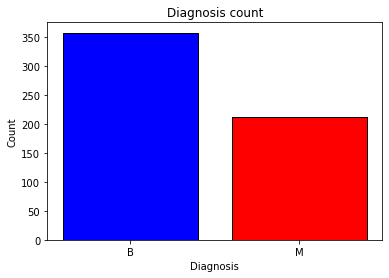

In [15]:
counts = data.diagnosis.value_counts()

plt.bar(counts.index, counts, color=['blue', 'red'], edgecolor='black') 
plt.title('Diagnosis count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [25]:
print('So we have ' + str(counts[0]) + ' benign cells and ' + str(counts[1]) + ' malignant cells. In other words, ' + str(round(100*counts[0]/counts.sum(),2)) + 
         '% of the cells are benign and ' + str(round(100*counts[1]/counts.sum(), 2)) + '% are malignant ones.') 

So we have 357 benign cells and 212 malignant cells. In other words, 62.74% of the cells are benign and 37.26% are malignant ones.


We are going to check possible differences between these two groups by plotting histograms.

In [26]:
group_b =  data.loc[data['diagnosis'] == 'B'].copy()
group_m =  data.loc[data['diagnosis'] == 'M'].copy()

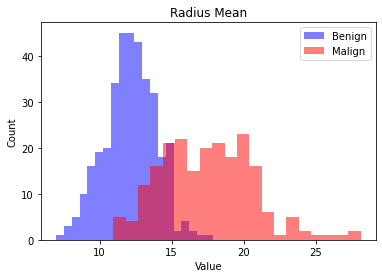

In [30]:
plt.hist(group_b.radius_mean, bins=20, alpha=0.5, label='Benign', color='blue')
plt.hist(group_m.radius_mean, bins=20, alpha=0.5, label='Malign', color='red')

plt.title('Radius Mean')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()

plt.show()